# **Data Cleaning and Preprocessing**

In this notebook we are going to do Data Cleaning and Preprocessing on a titanic dataset.

## 1. Data Exploration

Load the dataset(titanic) and check basic info and visualize distributions to understand the raw data’s structure and identify key issues (nulls, outliers, categorical variables).

## 2. Handling Missing Values

Detect the columns with missing values and fill numerical nulls and fill/drop categorical nulls to ensure no missing values remain that could skew ML models.

## 3.Encoding Categorical Features

Identify categorical columns and apply encoding to covert all categorical data to numerical formats for ML algorithms.

## 4. Feature Scaling and Outliers

scale numerical columns and visualize result to ensure all features are on a similar scale and outliers are addressed.

In [797]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

### 1. **Data Exploration**

In [798]:
# Load the dataset
df=pd.read_csv("data/Titanic-Dataset.csv")

# Display first 5 rows to preview data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [799]:
# Check data types, non-null counts, and memory usage
df.info()

# Summary statistics for numerical columns (mean, min, max, etc.)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [800]:
# Installing Seaborn library
!pip install seaborn

In [801]:
# Count missing values per column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

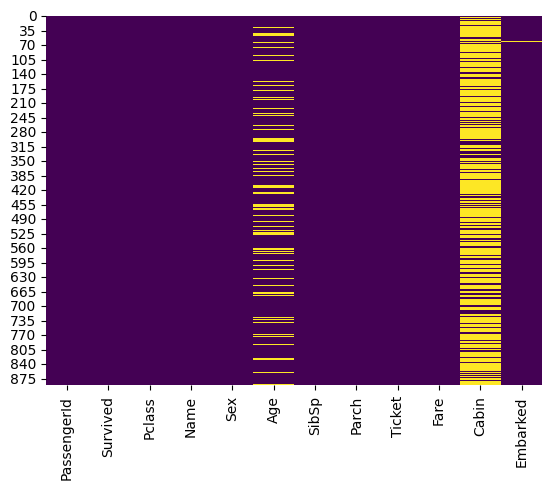

In [802]:
# Visualize missing data (yellow=missing)
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

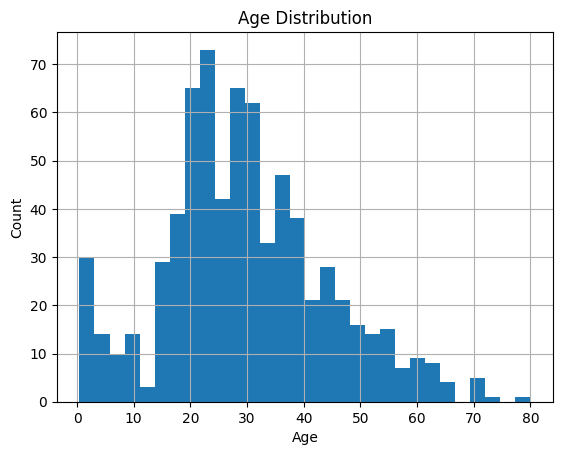

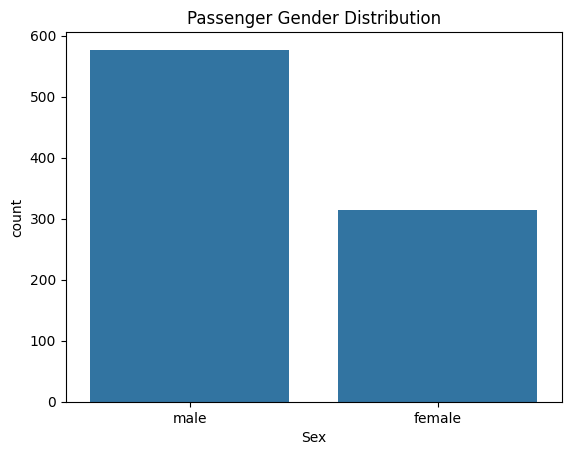

In [803]:
# Histogram for numerical columns (e.g., Age, Fare)
df['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Countplot for categorical columns (e.g., Survived, Sex)
sns.countplot(x='Sex', data=df)
plt.title('Passenger Gender Distribution')
plt.show()

### Observations from Data Exploration

### **`Missing Values`**:  
   - `Age`: 177 missing -> Will impute with median.  
   - `Cabin`: 687 missing -> May drop this column.  
### **`Outliers`**:  
   - `Fare` has extreme values (max = 512).  
### **`Categorical Variables`**:  
   - `Sex`, `Embarked` need encoding for ML.  

### 2. **Handling Missing Values**

In [804]:
# Drop columns with too many missing values or no predictive value (e.g., 'Cabin', 'PassengerId')
df.drop(['Cabin', 'PassengerId', 'Ticket','Name'], axis=1,inplace=True)

In [805]:
# Check remaining columns.
df.columns 

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [806]:
# Fill missing 'Age' with median 
df['Age'] = df['Age'].fillna(df['Age'].median())  

In [807]:
# Fill missing 'Embarked' with mode 
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [808]:
# To check missing values again
df.isnull().sum()  

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

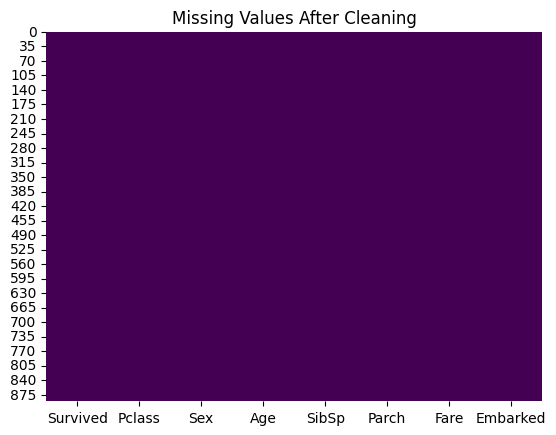

In [809]:
# Heatmap to confirm no missing values remain
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values After Cleaning")
plt.show()

### Observations from Handling Missing Values  

 ### **`Dropped Columns`**:  
   - `Cabin`: Too many missing values.  
   - `PassengerId`, `Ticket`: Irrelevant for analysis.  
### **`Imputed Missing Values`**:  
   - `Age`: Filled with median (`28.0`).  
   - `Embarked`: Filled with mode (`'S'`).  

### 3. **Encoding Categorical Features**

In [810]:
# List categorical columns in the dataset 
categorical_cols = ['Sex', 'Embarked', 'Pclass']  

# Display first 5 rows to verify categorical data
print("Categorical columns preview:")
print(df[categorical_cols].head())

Categorical columns preview:
      Sex Embarked  Pclass
0    male        S       3
1  female        C       1
2  female        S       3
3  female        S       1
4    male        S       3


In [811]:
# One-hot encode 'Sex' and 'Embarked' 
# drop_first=True avoids multicollinearity (e.g., only 'Sex_male' needed instead of both 'Sex_male' and 'Sex_female')
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True,dtype=int)

# Verify new binary columns
print("After one-hot encoding:")
print(df.filter(like='Sex_').head())  # Check 'Sex_male'
print(df.filter(like='Embarked_').head())  # Check 'Embarked_Q', 'Embarked_S'

After one-hot encoding:
   Sex_male
0         1
1         0
2         0
3         0
4         1
   Embarked_Q  Embarked_S
0           0           1
1           0           0
2           0           1
3           0           1
4           0           1


In [812]:
# Label encode 'Pclass' (ordinal: 1st, 2nd, 3rd class have meaningful order)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Convert 'Pclass' to numerical labels (0, 1, 2)
df['Pclass'] = le.fit_transform(df['Pclass'])

# Verify encoding
print("Unique values in 'Pclass' after encoding:", df['Pclass'].unique())

Unique values in 'Pclass' after encoding: [2 0 1]


In [813]:
# Display the first 3 rows to confirm all encoding worked
print("Final DataFrame after encoding:")
print(df.head(3))

Final DataFrame after encoding:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       2  22.0      1      0   7.2500         1           0   
1         1       0  38.0      1      0  71.2833         0           0   
2         1       2  26.0      0      0   7.9250         0           0   

   Embarked_S  
0           1  
1           0  
2           1  


### Observations from Encoding Categorical Variables  

### **`One-Hot Encoding`**  
- Applied to: `Sex`, `Embarked` (nominal data).  
- **Output Columns**:  
  - `Sex_male`: `1` for male, `0` for female.  
  - `Embarked_Q`, `Embarked_S`: Binary flags for Queenstown/Southampton (Cherbourg is baseline).  

### **`Label Encoding`**  
- Applied to: `Pclass` (ordinal data).  
- **Mapping**:  
  - `0`: 1st class, `1`: 2nd class, `2`: 3rd class.  

### **4. Feature Scaling and Outlier Treatment**

In [814]:
# List numerical columns needing scaling (e.g., 'Age', 'Fare')
numerical_cols = ['Age', 'Fare'] 

# Check current distributions (mean, min, max)
print("Before Scaling:")
print(df[numerical_cols].describe())

Before Scaling:
              Age        Fare
count  891.000000  891.000000
mean    29.361582   32.204208
std     13.019697   49.693429
min      0.420000    0.000000
25%     22.000000    7.910400
50%     28.000000   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200


In [815]:
# Remove biologically impossible ages (e.g., Age ≤ 0 or > 120)
df = df[(df['Age'] > 0) & (df['Age'] <= 120)]

# Remove negative fares (if any)
df = df[df['Fare'] >= 0]

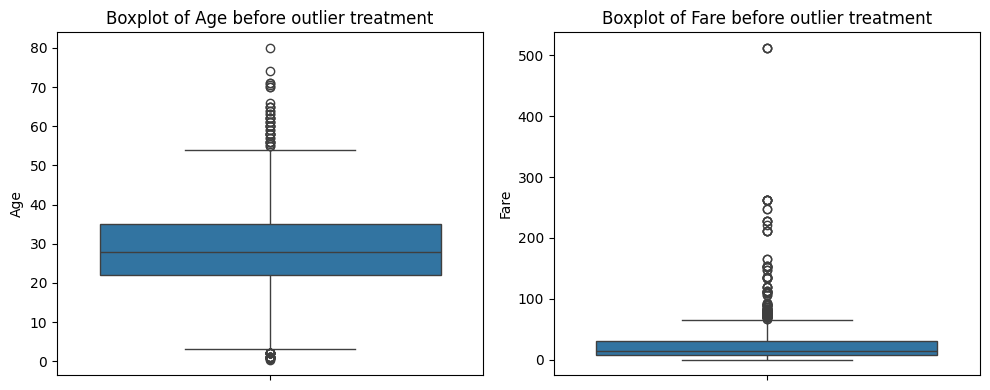

In [816]:
# Plot boxplots for scaled numerical features
plt.figure(figsize=(10, 4))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col} before outlier treatment")
plt.tight_layout()
plt.show()

In [817]:
# Calculate IQR for 'Fare' (for example)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outliers in 'Fare': Values < {lower_bound:.2f} or > {upper_bound:.2f}")

Outliers in 'Fare': Values < -26.72 or > 65.63


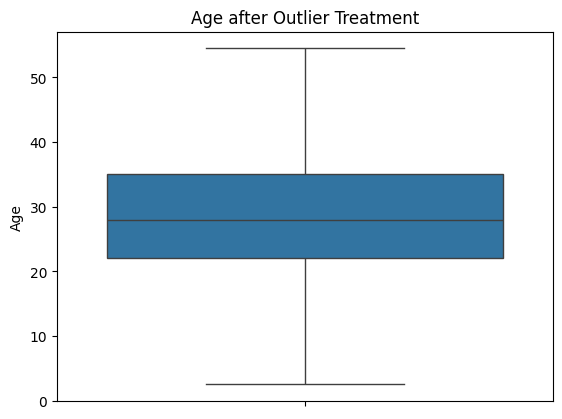

In [818]:
# Proceed with outlier treatment 
Q1, Q3 = df['Age'].quantile([0.25, 0.75])
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound= Q1 - 1.5 * IQR
df['Age'] = df['Age'].clip(upper=upper_bound,
                           lower=lower_bound)  

# Visualize
sns.boxplot(data=df['Age'])
plt.title("Age after Outlier Treatment")
plt.show()

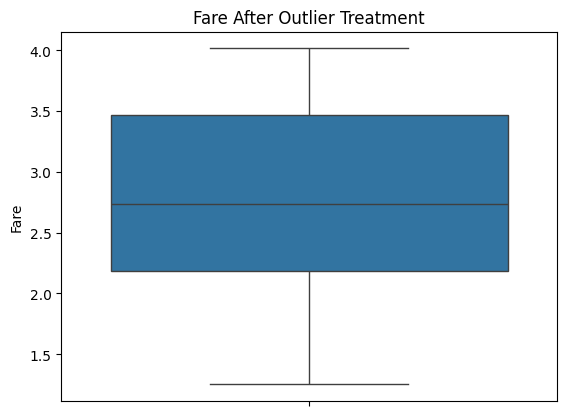

In [819]:
# Outlier Treatment in Fare column
# Step 1: Cap outliers 
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
df['Fare'] = df['Fare'].clip(upper=upper_bound,lower=lower_bound) 

# Step 2: Log-transform 
df['Fare'] = np.log1p(df['Fare'])  

# Step 3: Verify Fare after Outlier Treatment
sns.boxplot(data=df['Fare'])  
plt.title("Fare After Outlier Treatment")
plt.show()

In [820]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale selected columns (mean=0, std=1)
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Verify scaling
print("\nAfter Standardization:")
print(df[numerical_cols].describe())  

# Keeping the data in scaled form for further use


After Standardization:
                Age          Fare
count  8.910000e+02  8.910000e+02
mean   2.392400e-17  1.221121e-16
std    1.000562e+00  1.000562e+00
min   -2.199638e+00 -2.226301e+00
25%   -5.834321e-01 -9.549153e-01
50%   -8.613809e-02 -2.057032e-01
75%    4.940382e-01  7.845899e-01
max    2.110244e+00  1.533780e+00


In [821]:
# Dataset after cleaning and preprocessing(both age and fare are scaled so you can negative values in them )
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,2,-0.583432,1,0,-1.059685,1,0,1
1,1,0,0.742685,1,0,1.533780,0,0,0
2,1,2,-0.251903,0,0,-0.952686,0,0,1
3,1,0,0.494038,1,0,1.499020,0,0,1
4,0,2,0.494038,0,0,-0.933763,1,0,1


### Observations from Feature Scaling & Outliers  

### **`Scaling`**  
- **Method**: StandardScaler (mean=0, std=1).  
- **Columns Scaled**: `Age`, `Fare`.  

### **`Outlier Treatment`**  
- **Method**: IQR-based capping.  
- **Bounds for 'Fare'**: ±1.5*IQR.  